# Deconstruct - Bubble stats 
- Number of traversals
- Number of paths
- Size of bubbles

In [2]:
# Import libs
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter


In [3]:
# Read the data function
def read_data(filename):
    data = []
    with open(filename) as file: 
        for line in file.readlines(): 
            if not line.startswith("#"): 
                ls = line.split()
                data.append([ls[0], ls[1], ls[2], ls[3:]])
    return data

In [4]:
# Read all data - takes some time to run 
d = [1,2,3,4,5]
data = []
for x in d: 
    print(x)
    data.extend(read_data("../results/deconstruct/stats/chr"+ str(x)+"_Chr"+str(x)+".stats"))

1
2
3
4
5


In [5]:
# Only take the SVs
# Definition of a SV is "having a allele which is bigger than 15 bp"
svs = []
for v in data: 
    lengths = [int(x) for x in v[2].split(",")]
    if max(lengths) >= 15: 
        svs.append(v)

In [6]:
# Just check an example
svs[:2]

[['>103>135',
  '>103>105>106>108>112>114>115>116>118>119>121>122>124>125>127>129>134>135,>103>105>106>108>112>114>115>116>118>119>121>122>124>126>127>132>134>135,>103>105>107>108>112>114>115>116>118>119>121>122>124>125>127>129>134>135,>103>105>106>108>112>114>115>116>118>119>121>123>124>125>127>133>134>135,>103>105>106>108>112>114>115>116>118>120>121>122>124>125>127>129>134>135,>103>105>106>108>112>114>115>117>118>119>121>122>124>125>127>129>130>135,>103>105>106>108>112>114>115>116>118>119>121>122>124>126>127>129>134>135,>103>105>106>108>112>114>115>116>118>119>121>122>124>125>127>128>129>130>131>134>135,>103>104>131>134>135',
  '135,135,135,135,135,135,135,146,135',
  ['4',
   '.',
   '2',
   '0',
   '.',
   '.',
   '0',
   '3',
   '.',
   '.',
   '.',
   '5',
   '.',
   '.',
   '.',
   '0',
   '0',
   '0',
   '5',
   '8',
   '6',
   '0',
   '0',
   '.',
   '0',
   '1',
   '7',
   '0']],
 ['>156>324',
  '>156>157>160>161>163>164>166>167>168>169>171>172>173>175>176>178>179>181>182>184

# Traversal

How many different traversals have been identified in each bubble. In reference terms, this number if the amount of alleles for each variation. 

In [7]:
# Traversal number
traversal_numb = []
for v in svs: 
    traversal_numb.append(len(v[2].split(",")))

In [8]:
import matplotlib
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False

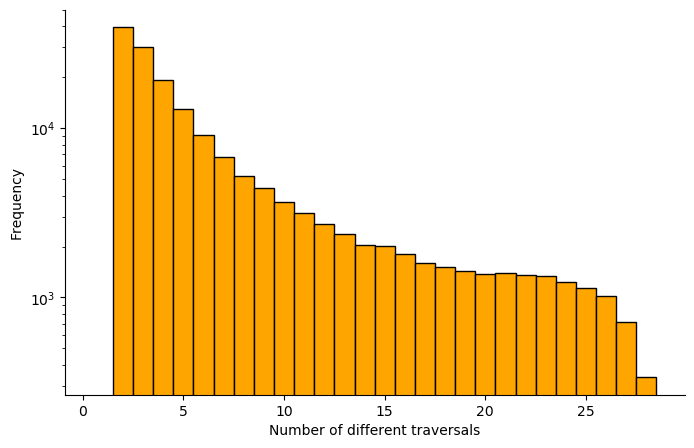

In [9]:
plt.figure(figsize = (8,5))
ax = plt.hist(traversal_numb, bins = np.linspace(0.5,28.5,29), log = True, edgecolor = "black", color = "orange")
plt.ylabel("Frequency")
plt.xlabel("Number of different traversals")
plt.savefig("plots/traversal.1000.png", dpi = 1000)
plt.savefigd = [1,2,3,4,5]

plt.savefig("plots/traversal.300.png", dpi = 300)
plt.savefig("plots/traversal.svg", format = "svg")
plt.show()

# Size of bubbles

The size of the bubble is the amount of sequence between the two anchors. For example a SNP bubble has the total size of 2 (2x1bp), maximum size of 1 and minium size of 1. Ratio is also 1. 

In [10]:

sizz = []
for v in svs: 
    sizz.append(max([int(x) for x in v[2].split(",")]))

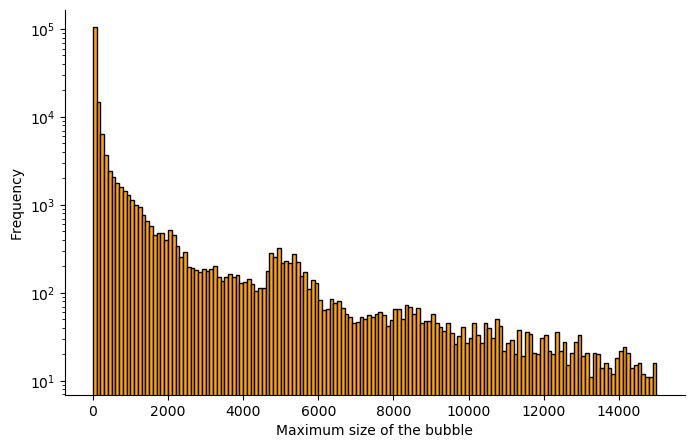

In [11]:
# It is log and only goes to the size of 15k
plt.figure(figsize = (8,5))
plt.hist(sizz, bins = np.linspace(0, 15000,151), log = True, edgecolor = "black", color = "orange")
plt.ylabel("Frequency")
plt.xlabel("Maximum size of the bubble")
plt.savefig("plots/maxsize.1000.png", dpi = 1000)
plt.savefig("plots/maxsize.300.png", dpi = 300)
plt.savefig("plots/maxsize.svg", format = "svg")
plt.show()

# Number of accessions in each bubble

Number of different genomes in each bubble. This does not reflect the possibility that a accession can pass the same bubble multiple times.

In [12]:

touched_paths = []
for v in svs: 
    touched_paths.append(len([x for x in v[3] if x != "."]))

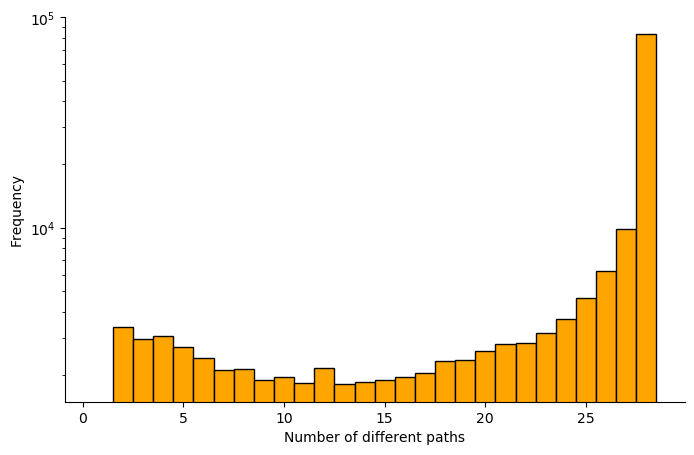

In [13]:
plt.figure(figsize = (8,5))
plt.hist(touched_paths, bins = np.linspace(0.5,28.5,29), log = True, edgecolor = "black", color = "orange")
plt.ylabel("Frequency")
plt.xlabel("Number of different paths")
plt.savefig("plots/accession.1000.png", dpi = 1000)
plt.savefig("plots/accession.300.png", dpi = 300)
plt.savefig("plots/accession.svg", format = "svg")
plt.show()